# Stroop Effect  
## <font color=blue>Background Information</font>  
In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

## Source  
1. https://en.wikipedia.org/wiki/Stroop_effect  Stroop test introduction
2. https://www.surveysystem.com/sscalc.htm Calculate sample size
3. https://libguides.library.kent.edu/SPSS/PairedSamplestTest Paired t Test
4. https://pythonfordatascience.org/paired-samples-t-test-python/ Paired t Test with Python
5. https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.wilcoxon.html Wilcoxon Signed-Ranks Test

### (1) What is the independent variable? What is the dependent variable?  
The independent variable is the conditions: congruent and incongruent. The dependent variable is the response time in these two conditions.


### (2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.  

The null hypothesis: no difference between response time in congruent and incongruent conditions.
The alternative hypothesis: there is difference between the response time in congruent and incongruent conditions.

$N_0: \mu_{diff}  \quad = \quad 0 $  
$N_1: \mu_{diff}  \quad \not= \quad 0 $   


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

% matplotlib inline
df = pd.read_csv('stroopdata.csv')
print(df.shape)
df.head()

(24, 2)


,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


### (3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [29]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


1. There are 24 participants in the test. Sample size is too small.
2. The participants have an average of 14.05 in congruent condition and an average of 22.05 in incougruent condition, a difference of 8 which is large. It seems that there is a difference in the response time in these two conditions and the null hypothesis is likely to be rejected.
3. Participants' perform in the incongruent has a larger standard variance (4.797) compared with 3.559 in congruent condition. 

### (4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

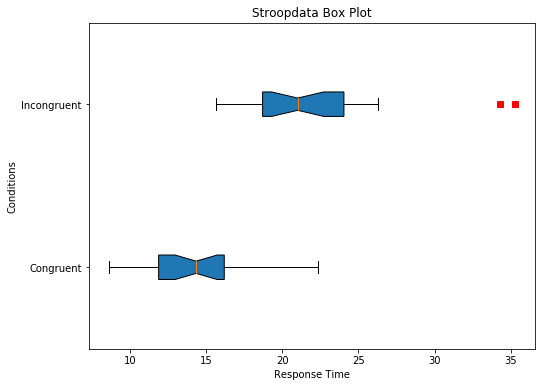

In [20]:
fit = plt.figure(figsize=(8,6))
plt.boxplot([df.Congruent, df.Incongruent], notch=True, labels = df.columns, vert=False, sym="rs", patch_artist=True);
plt.xlabel("Response Time")
plt.ylabel("Conditions")
plt.title("Stroopdata Box Plot");

1. There are two outliers in the incongruent condition. 
2. There is no overlap between the inter-quartile for these two conditions.
3. The mean of incongruent is higher than that of congruent.

### (5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

The statistical test that will be adopted is a two tail paired t-test since the same participant takbe the stroop test in different conditions.  
There are some assumptions should be met:  
- the dependent variable must be continuous
- the dependent variable should be approximately normally distributed
- the dependent should not contain any significant outliers

Assumption Check: Normal Distribution

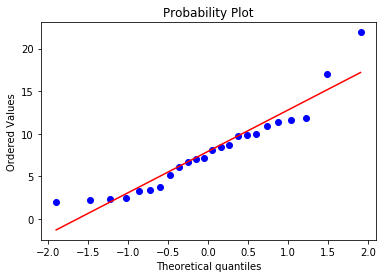

In [30]:
df["dif"] = df.Incongruent - df.Congruent
stats.probplot(df.dif, plot = plt);

There is some deviation. To make sure, the Shapiro-Wilk test is used.

In [32]:
stats.shapiro(df.dif)

(0.9104195833206177, 0.03601718321442604)

The p-value 0.036 < 0.05. The test is significant. Assumption check failed.

Assumption Check: Outliers

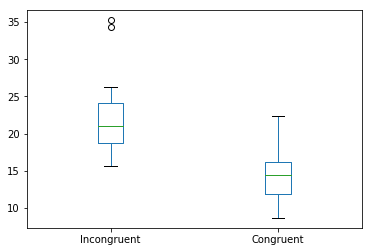

In [31]:
df[['Incongruent', 'Congruent']].plot(kind='box');

There are two outliers in the incongruent condition. Assumption check failed.  
As a result, Wilcoxon Signed-Ranks Test is applied.

In [ ]:
stats.wilcoxon()